In [ ]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-3JKKF7H\MSSQLSERVER01;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [ ]:
#create dataframe from SQL query
df=pd.read_sql_query('SELECT * FROM CountryVsRevenue',conn)
df


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CountryRegionCode,TotalSalesLastYear,TotalSalesYTD
0,AU,2.278549e+06,5.977815e+06
1,CA,5.693989e+06,6.771829e+06
2,DE,1.307950e+06,3.805202e+06
3,FR,2.396540e+06,4.772398e+06
4,GB,1.635823e+06,5.012905e+06
5,US,1.940250e+07,2.641106e+07


In [ ]:
#Adding new column to df,sorting the data
conditions = [
    (df['CountryRegionCode'] == 'AU'),
    (df['CountryRegionCode'] =='CA'),
    (df['CountryRegionCode'] == 'DE'),
    (df['CountryRegionCode'] == 'FR'),
    (df['CountryRegionCode'] == 'GB'),
    (df['CountryRegionCode'] == 'US')
]

values = ['Australia', 'Canada', 'Denmark', 'France','GreatBritain','America']

df['CountryName'] = np.select(conditions, values)
df=df.sort_values('TotalSalesYTD',ascending=True)
print(df)

  CountryRegionCode  TotalSalesLastYear  TotalSalesYTD   CountryName
2                DE        1.307950e+06   3.805202e+06       Denmark
3                FR        2.396540e+06   4.772398e+06        France
4                GB        1.635823e+06   5.012905e+06  GreatBritain
0                AU        2.278549e+06   5.977815e+06     Australia
1                CA        5.693989e+06   6.771829e+06        Canada
5                US        1.940250e+07   2.641106e+07       America


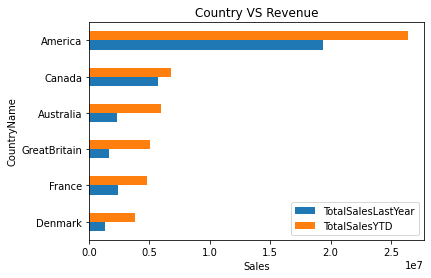

In [ ]:
#Plotting horizontal bar graph
df.plot(x='CountryName', kind='barh',title='Country VS Revenue' )
plt.xlabel('Sales')
plt.show()

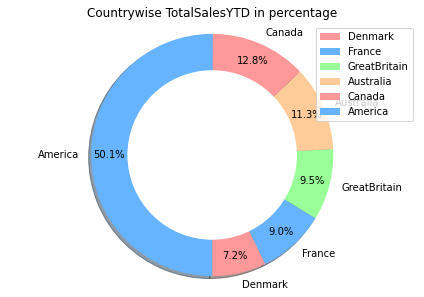

In [ ]:
#Plotting Piechart

import matplotlib.pyplot as plt

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = None
 
plt.pie(df['TotalSalesYTD'], colors = colors,shadow='True', labels=df['CountryName'], autopct='%1.1f%%', startangle=270, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Countrywise TotalSalesYTD in percentage',color='black')
plt.legend()
plt.show()

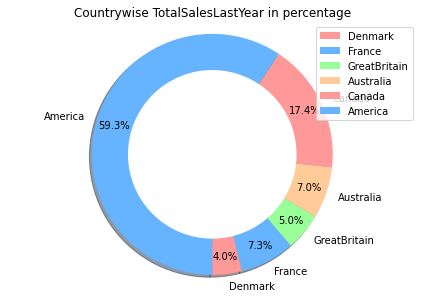

In [ ]:
#Plotting Pie chart
import matplotlib.pyplot as plt

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = None
 
plt.pie(df['TotalSalesLastYear'], colors = colors,shadow='True', labels=df['CountryName'], autopct='%1.1f%%', startangle=270, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Countrywise TotalSalesLastYear in percentage',color='black')
plt.legend()
plt.show()